In [48]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, sys

sys.path.insert(0,'scripts/tools_for_VAE/')
import tools_for_VAE
from tools_for_VAE import utils

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")

In [49]:
data_dir = 'images/single/test'
root = 'galaxies_isolated_20190927'

In [50]:
dfs = []
for i in range(1):
    dfs.append(pd.read_csv(os.path.join(data_dir, root+'_{}_data.csv'.format(i))))
df = dfs[0]
for df2 in dfs[1:]:
    df = df.append(df2)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
redshift        300 non-null float64
moment_sigma    300 non-null float64
e1              300 non-null float64
e2              300 non-null float64
e1_obs          300 non-null float64
e2_obs          300 non-null float64
SNR             300 non-null float64
SNR_peak        300 non-null float64
dtypes: float64(8)
memory usage: 18.8 KB


In [52]:
df.head()

,redshift,moment_sigma,e1,e2,e1_obs,e2_obs,SNR,SNR_peak
0,0.3301,2.353559,-0.266782,0.233254,-0.120161,0.104187,998.753977,1.923716
1,4.2916,1.575005,0.740713,0.027246,0.082175,0.003064,19.633977,0.034624
2,0.3586,2.641967,-0.092189,0.369457,-0.046881,0.204779,423.015153,0.611760
3,0.9434,2.637097,0.272485,0.526306,0.176059,0.340811,16.683419,0.019727
4,1.1132,1.805453,0.461782,0.289766,0.134822,0.084535,10.242211,0.016251


In [53]:
df.describe()

,redshift,moment_sigma,e1,e2,e1_obs,e2_obs,SNR,SNR_peak
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.070501,1.995123,0.035108,0.019893,0.012269,0.007038,61.379351,0.088367
std,0.780282,0.459527,0.459420,0.450504,0.178861,0.181022,120.172325,0.179290
min,0.030000,1.527071,-0.987078,-0.987945,-0.486964,-0.651320,3.093174,0.005206
25%,0.569200,1.690762,-0.298229,-0.296287,-0.092443,-0.081842,14.776328,0.023425
50%,0.834150,1.863681,0.015469,0.014170,0.005722,0.004491,23.875808,0.035987
75%,1.293650,2.119330,0.393038,0.337295,0.115039,0.103277,44.842347,0.066917
max,4.574900,5.055300,1.295658,1.050116,0.665124,0.636830,998.753977,1.923716


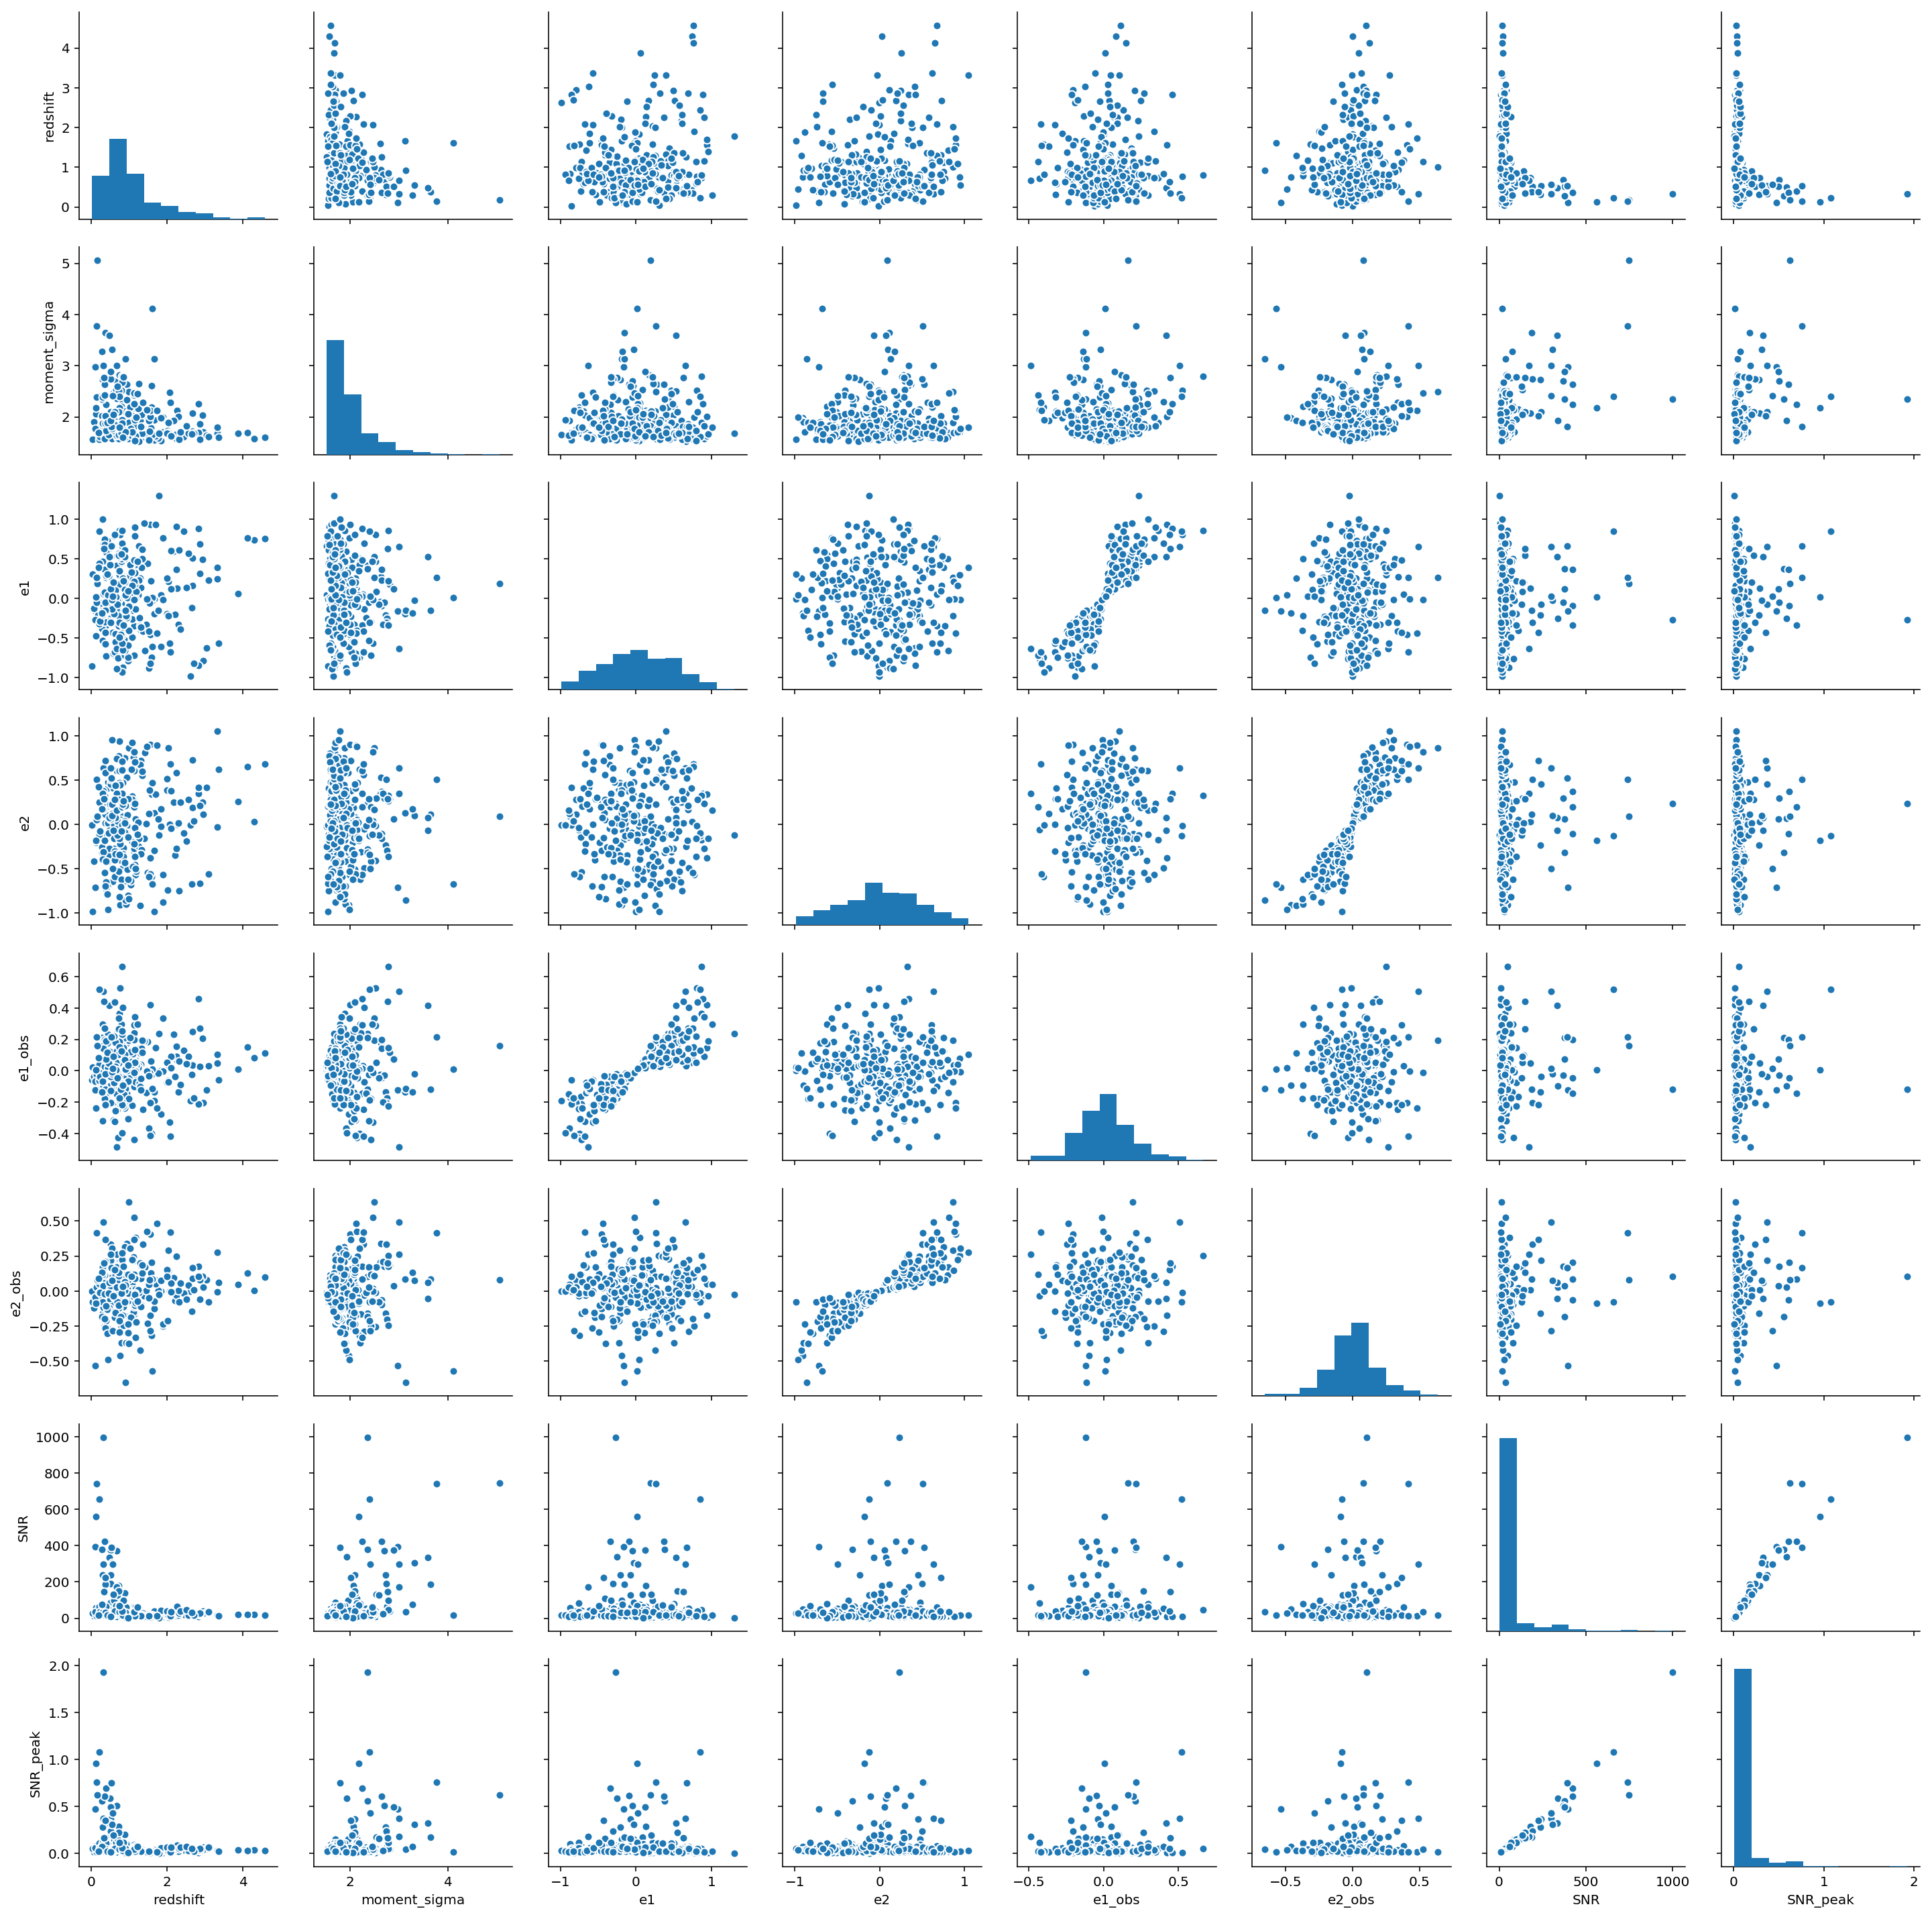

In [54]:
sns.pairplot(df)

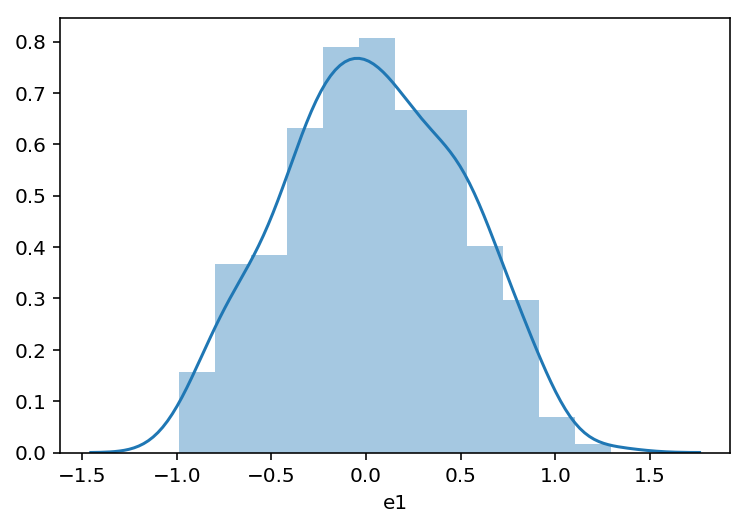

In [55]:
sns.distplot(df['e1'])

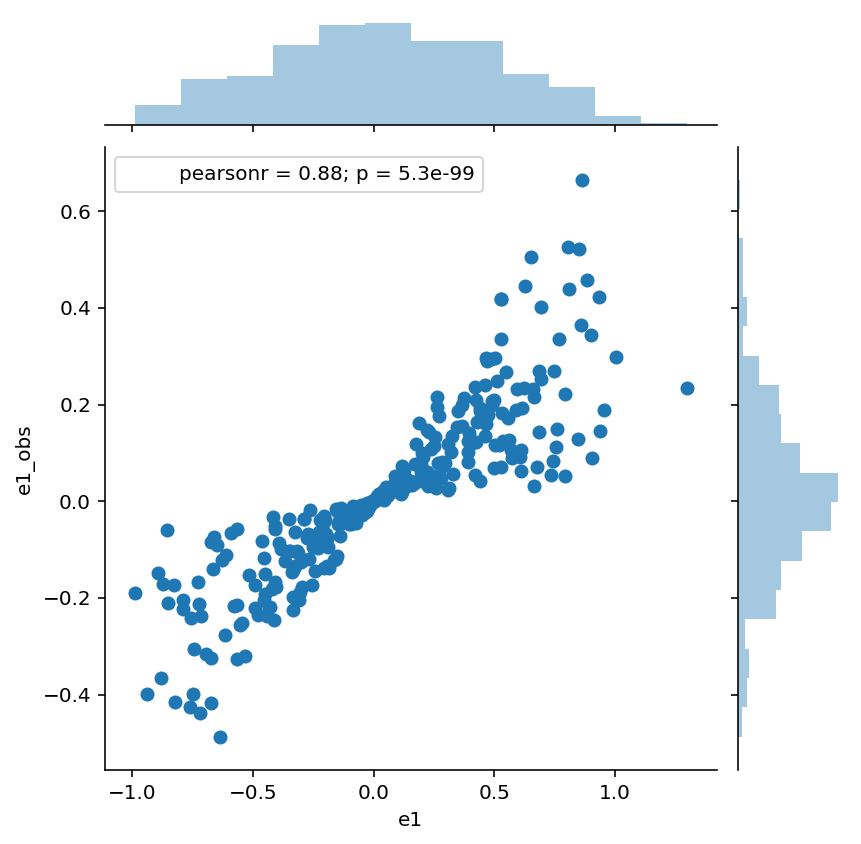

In [56]:
sns.jointplot(df['e1'], df['e1_obs'])

In [28]:
galaxies.shape

(1000, 2, 10, 64, 64)

In [32]:
np.sum(df['e1']<-1.)

4

In [37]:
galaxies[df['e1']>1.].shape

(5, 2, 10, 64, 64)

In [46]:
np.argwhere(df['e1']>1.)[:,0]

array([180, 245, 297, 741, 918])

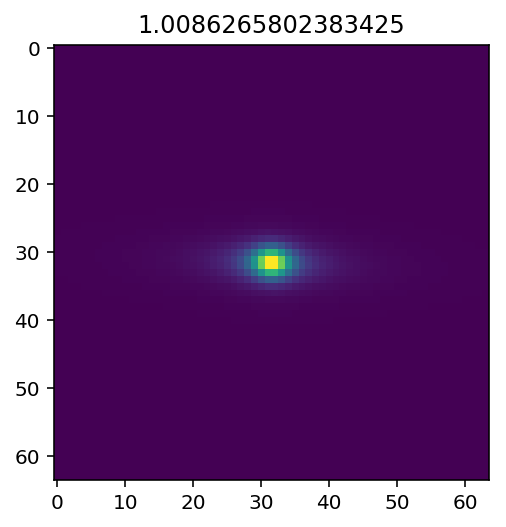

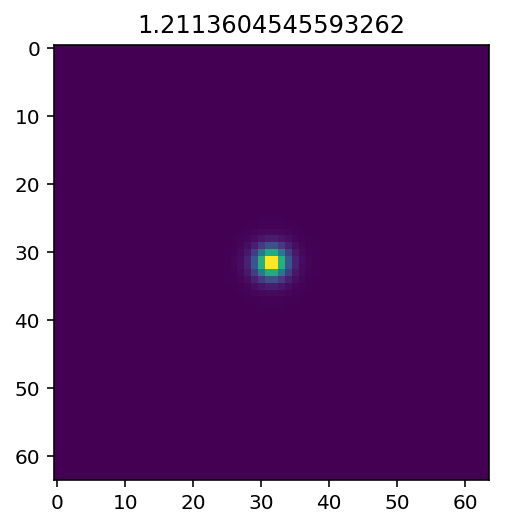

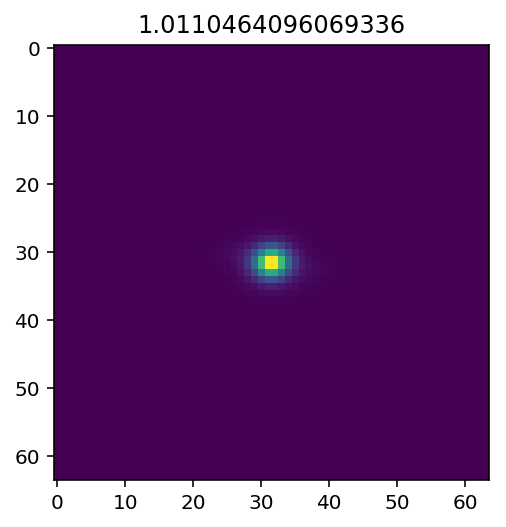

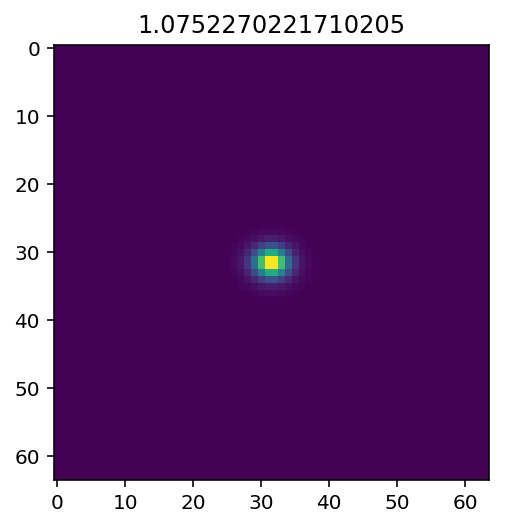

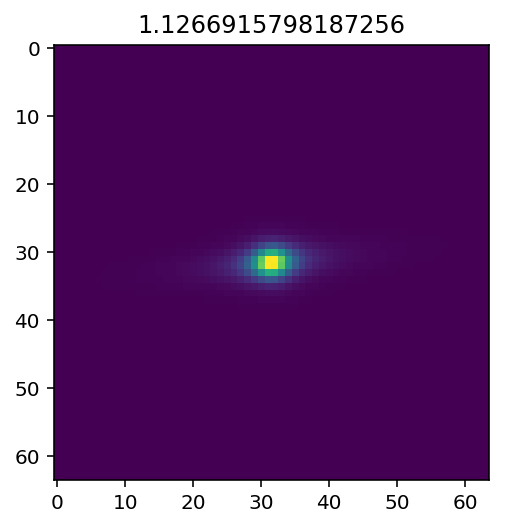

In [47]:
for idx in np.argwhere(df['e1']>1.)[:,0]:
    plt.figure()
    plt.imshow(galaxies[idx,0,6])
    plt.title(df['e1'][idx])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The '

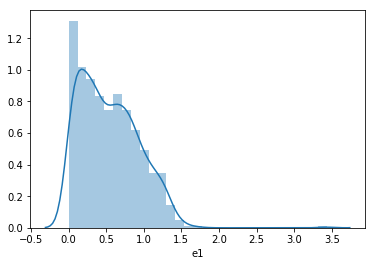

In [22]:
sns.distplot(np.sqrt(df['e1']**2+df['e1']**2))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a

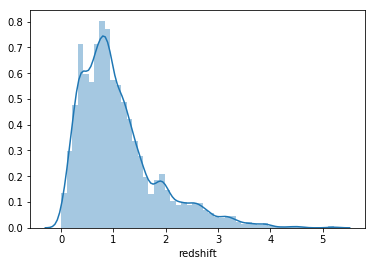

In [18]:
sns.distplot(df['redshift'])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a

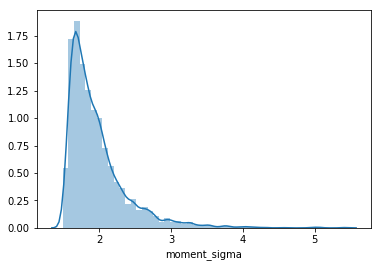

In [19]:
sns.distplot(df['moment_sigma'])

Text(0.5,0,'SNR')

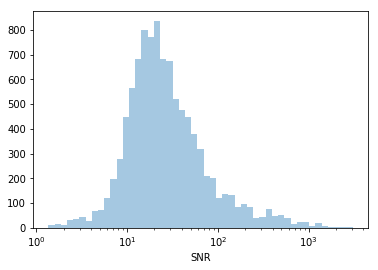

In [20]:
sns.distplot(df['SNR'], bins=np.geomspace(np.min(df['SNR']), np.max(df['SNR']), 50), kde=False)
plt.xscale('log')
plt.xlabel('SNR')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a

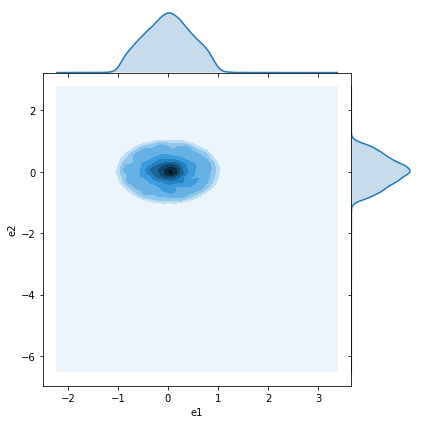

In [21]:
sns.jointplot('e1', 'e2', data=df, kind="kde", space=0)

In [27]:
galaxies = np.load(os.path.join(data_dir, root+'_{}_images.npy'.format(0)))
# _ = utils.norm(galaxies[:,0], bands=range(10), channel_last=False)
# _ = utils.norm(galaxies[:,1], bands=range(10), channel_last=False)

In [25]:
def plot_rgb(gal, bands=[5,6,7], ax=None, band_first=True, zoom=1.5):
    if ax is None:
        ax = plt.subplot()
    if band_first:
        tr = [1,2,0]
    else:
        tr = [0,1,2]
    ax.imshow(np.clip(gal[bands,:,:].transpose(tr), 0., 1.), extent=(-1,1,-1,1))
    ax.set_xlim(-1./zoom,1./zoom)
    ax.set_ylim(-1./zoom,1./zoom)
    ax.axis('off')

def plot_all_bands(gal, band_first=True, cmap=mpl.cm.gray, zoom=1.5):
    filters = 'HJYVugrizy'
    bax = 0 if band_first else -1
    n = gal.shape[bax]
    fig, axes = plt.subplots(1, n, figsize=(4*n,4))
    for i in range(n):
        ax = axes[i]
        if band_first:
            ax.imshow(np.clip(gal[i], 0., 1.), cmap=cmap, extent=(-1,1,-1,1))
        else:
            ax.imshow(np.clip(gal[:,:,i], 0., 1.), cmap=cmap, extent=(-1,1,-1,1))
        ax.axis('off')
        ax.set_xlim(-1./zoom,1./zoom)
        ax.set_ylim(-1./zoom,1./zoom)
        ax.set_title(filters[i])

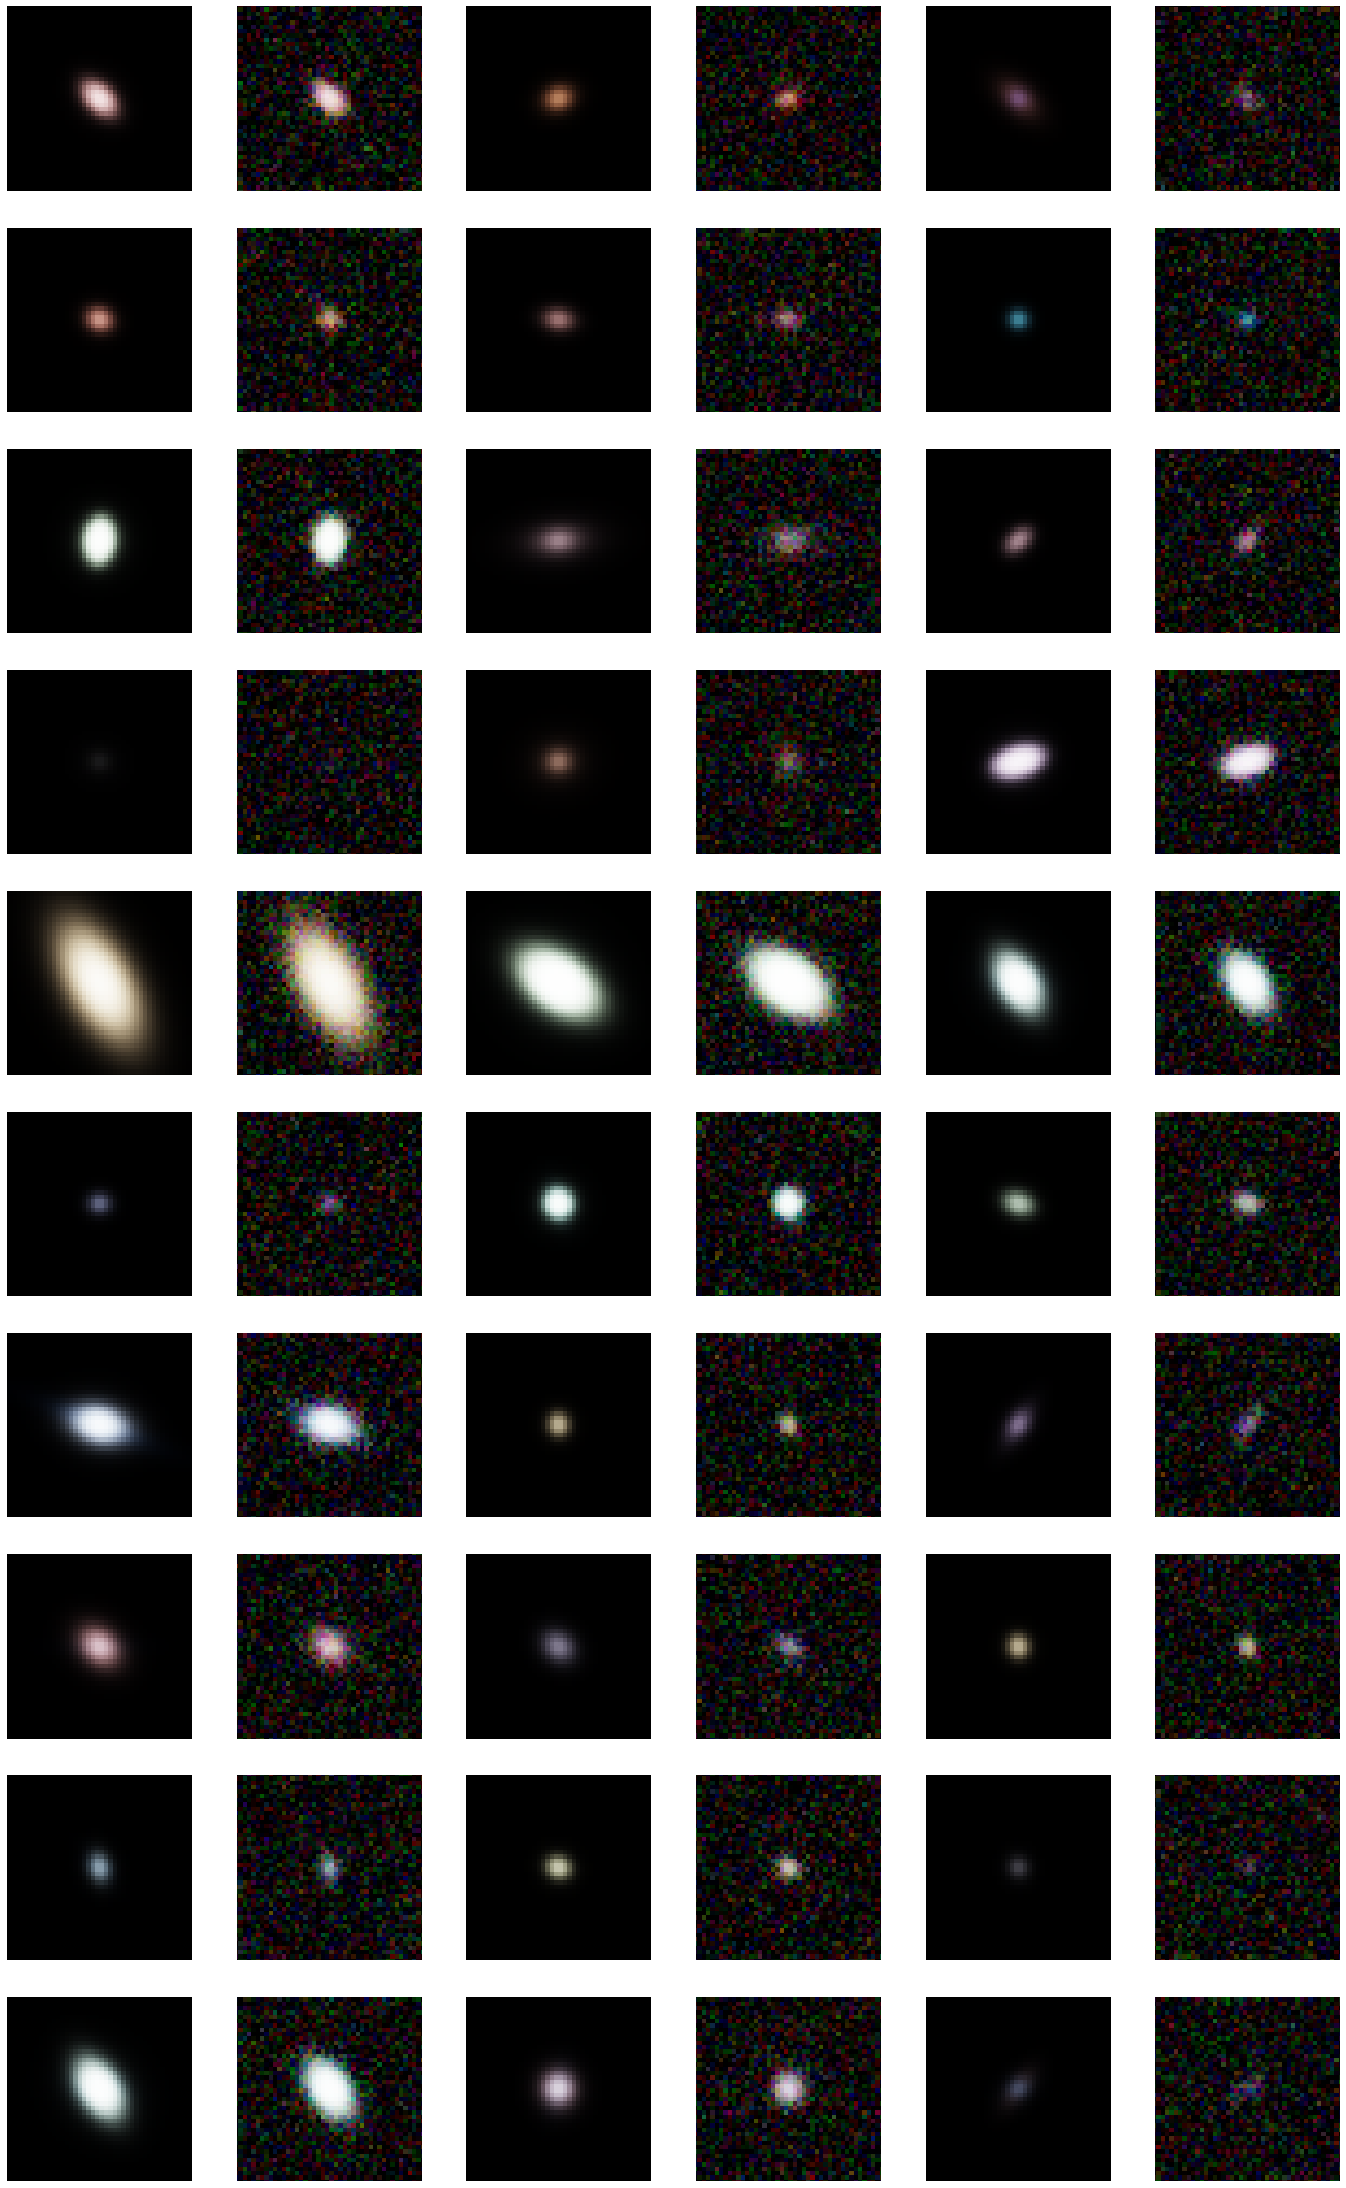

In [26]:
N = 10

fig, axes = plt.subplots(N,6, figsize=(6*4,N*4))
for i in range(N):
    for j in range(3):
        gal = galaxies[np.random.choice(range(len(galaxies)))]
        for k in range(2):
            plot_rgb(gal[k], ax=axes[i,j*2+k])

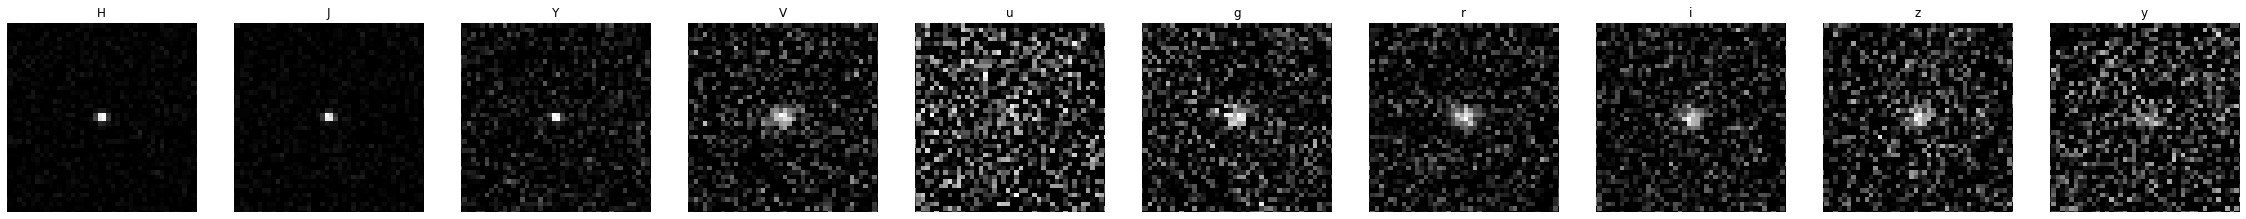

In [27]:
plot_all_bands(galaxies[3,1], band_first=True, cmap=mpl.cm.gray)

In [31]:
galaxies.shape

(1000, 2, 10, 64, 64)

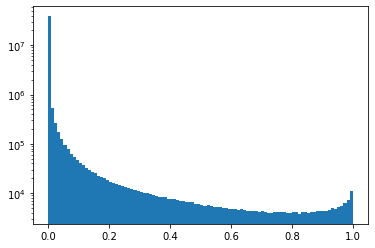

In [35]:
_ = plt.hist(galaxies[:,0].ravel(), 100, log=True)

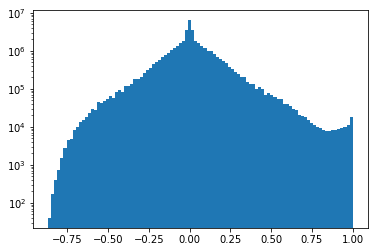

In [34]:
_ = plt.hist(galaxies[:,1].ravel(), 100, log=True)

In [36]:
galaxies = np.load(os.path.join('images/single/test', root+'_{}_images.npy'.format(0)))

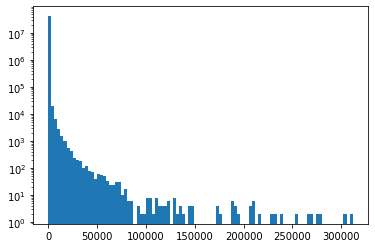

In [37]:
_ = plt.hist(galaxies[:,0].ravel(), 100, log=True)

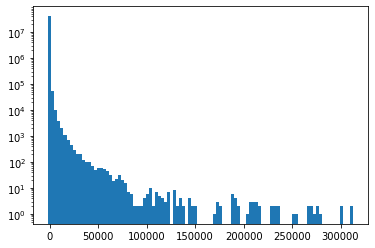

In [38]:
_ = plt.hist(galaxies[:,1].ravel(), 100, log=True)

In [39]:
%pwd

'/home/ubuntu/deblending/Deblender_VAE'

In [42]:
images_dir = '/home/ubuntu/deblending/Deblender_VAE/images/single/'


In [44]:
os.listdir(os.path.join(images_dir,'validation'))

['galaxies_isolated_20190914_0_images.npy',
 'galaxies_isolated_20190914_8_images.npy',
 'galaxies_isolated_20190914_4_images.npy',
 'galaxies_isolated_20190914_16_images.npy',
 'galaxies_isolated_20190914_7_images.npy',
 'galaxies_isolated_20190914_12_images.npy',
 'galaxies_isolated_20190914_11_images.npy',
 'galaxies_isolated_20190914_10_images.npy',
 'galaxies_isolated_20190914_2_images.npy',
 'galaxies_isolated_20190914_6_images.npy',
 'galaxies_isolated_20190914_3_images.npy',
 'galaxies_isolated_20190914_17_images.npy',
 'galaxies_isolated_20190914_1_images.npy',
 'galaxies_isolated_20190914_9_images.npy',
 'galaxies_isolated_20190914_19_images.npy',
 'galaxies_isolated_20190914_5_images.npy',
 'galaxies_isolated_20190914_18_images.npy',
 'galaxies_isolated_20190914_14_images.npy',
 'galaxies_isolated_20190914_13_images.npy',
 'galaxies_isolated_20190914_15_images.npy']

In [46]:
list_of_samples = [os.path.join(images_dir,'training', x) for x in os.listdir(os.path.join(images_dir,'training'))]


In [47]:
list_of_samples

['/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_0_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_8_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_39_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_45_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_59_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_68_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_35_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_34_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_44_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/s

In [58]:
for sample in list_of_samples:
#     print(sample)
    try:
        np.load(sample, mmap_mode='c')
        print(len(np.load(sample, mmap_mode='c')))
    except:
        print(sample)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_72_images.npy
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [57]:
    from tensorflow.keras.callbacks import ReduceLROnPlateau

In [60]:
np.random.randint(100, size=1)

array([30])

In [61]:
a = np.zeros((500, 64, 64, 6))

In [73]:
a[34,:,:,[2]].shape

(1, 64, 64)

In [22]:
np.argmin([4,3,1,3,6])

2

In [23]:
a = {}

In [24]:
a[0], a['2'] = 2, 3

In [25]:
a

{0: 2, '2': 3}

In [26]:
a = [4,3,1,3,6]

In [27]:
a.insert(0,a.pop(np.argmin(a)))

In [29]:
set(a)

{1, 3, 4, 6}